# Bismillahir Rehman ir Raheem

## Data Description
(from https://www.kaggle.com/c/titanic)
survival: Survival (0 = No; 1 = Yes)
pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name: Name

sex: Sex

age: Age

sibsp: Number of Siblings/Spouses Aboard

parch: Number of Parents/Children Aboard

ticket: Ticket Number

fare: Passenger Fare

cabin: Cabin

embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

**Special Notes:**

Pclass is a proxy for socio-economic status (SES)
1st ~ Upper; 
2nd ~ Middle; 
3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored. The following are the definitions used for sibsp and parch.

Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic

Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)

Parent: Mother or Father of Passenger Aboard Titanic

Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-

laws. Some children travelled only with a nanny, therefore parch=0 for them. 

As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

references:
** https://www.oreilly.com/learning/pivot-tables **

** https://elitedatascience.com/python-seaborn-tutorial
 
** http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/tree/master/cookbook/
 
** https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/ **
 
 ** http://pbpython.com/pandas-pivot-table-explained.html **
                    
                

https://github.com/vivek2606/Udacity-Titanic-Data-Analysis/blob/master/P2%20-%20Titanic%20Data%20Analysis%20-%20Re-submission%202%20date%20%2011.08.2016.ipynb



In [87]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
titanic=pd.read_csv('titanic-data.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Step 1-Data Cleaning
We will check for NaN or Null values and also check if any of the columns need to be added of removed

In [90]:
#total nu of null values in each column
titanic.apply(lambda x: sum(x.isnull()),axis=0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [91]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [92]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## There are 177 null values in age which can effect our results.So we have to fill these values by appropiate value

In [93]:
#first we find the mean
titanic['age'].mean()

29.69911764705882

The mean is 29 but we cant fill all the 177 values by 29 as there can be many children among these 177 values.Let us check the median

In [94]:
titanic['age'].median()

28.0

Median is also same as the mean.So now check how many children 

In [95]:
# we see that the 'who' column tells us whether the entry if of 'man' , 'woman' or 'child'.
#so we check the number of children here

In [96]:
def count_values(df,col_name):
    return df[col_name].value_counts()
count_values(titanic,'who')

man      537
woman    271
child     83
Name: who, dtype: int64

Number of children is 83 so we cannot fill the NaN values by media=28 or mean=29.We can fill the NaN entries with median if we have adult 'man' or 'woman'.
Let us check the NaN entries in titanic['age'] corressponding to titanic['who']='child

In [231]:
titanic.loc[titanic['who']=='child'].isnull().sum()

survived        0
pclass          0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        0
class           0
who             0
adult_male      0
deck           70
embark_town     0
alive           0
alone           0
Sex_integer     0
dtype: int64

We see that none of the 83 children have NaN values in their respective age column.
So its same to replace missing values of age with median =28

In [108]:
titanic['age'].fillna(titanic['age'].median(),inplace=True)

In [ ]:
# plotting the age using seaborn 

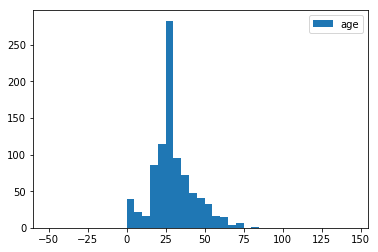

In [189]:
import numpy as np
plt.figure()
plt.hist(titanic['age'],bins=np.arange(-50,150,5),label='age')
plt.legend()

In [ ]:
#plotting age using maplotlib

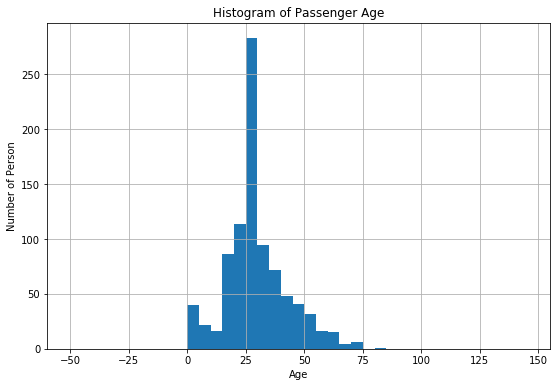

In [229]:
titanic.hist(column='age',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=np.arange(-50,150,5))
plt.xlabel("Age")
plt.ylabel("Number of Person")
plt.title("Histogram of Passenger Age");

We  see that most of the age group are between 20 and 50.The long branch 0f 28 is actually the filling of the NaN values with the median=29

In [230]:
#total nu of null values in each column
titanic.apply(lambda x: sum(x.isnull()),axis=0)

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
Sex_integer      0
dtype: int64

In [111]:
#Changing male=1 and female=1
#step1 .Make and empty column
titanic['Sex_integer']=np.nan
#step2 adding values 1 or 0
titanic.loc[titanic['sex']=='male','Sex_integer']=1
titanic.loc[titanic['sex']=='female', 'Sex_integer']=0
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Sex_integer
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1.0


We dont need columns like alive so we remove it

In [13]:
#removed unwanted columns
def remove_columns(df,column):
    return df.drop(column,inplace=True,axis=1)

remove_columns(titanic,'alive')

In [32]:
#the deck column has majority missing values.We will remove it
remove_columns(titanic,'deck')

ValueError: labels ['deck'] not contained in axis

In [33]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone,Sex_integer
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,False,1.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,False,0.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,True,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,False,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,True,1.0


In [36]:
# convert floats to integer
titanic['age']=titanic['age'].astype(int)

In [37]:
titanic['Sex_integer']=titanic['Sex_integer'].astype(int)

# Observations

##  Observation-1: Number of survived male and female

In [14]:
titanic_male_female=titanic.pivot_table('survived','sex',aggfunc='sum')
titanic_male_female

,survived
sex,
female,233
male,109


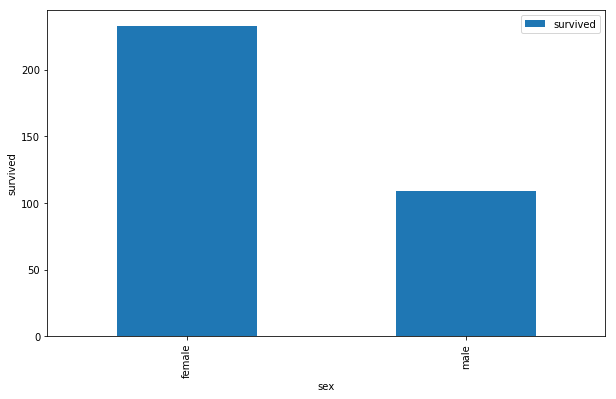

In [15]:
titanic_male_female.plot(kind='bar',figsize=(10,6))
plt.ylabel('survived')

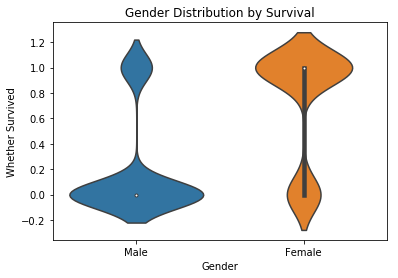

In [16]:
p = sns.violinplot(data = titanic, x = 'sex' , y ='survived')
p.set(title = 'Gender Distribution by Survival', 
        xlabel = 'Gender', 
        ylabel = 'Whether Survived', 
        xticklabels = ['Male', 'Female']);
plt.show()

In [18]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone,Sex_integer
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False,1.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False,0.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True,1.0


##  Observation-2: No of adult male,adult female and children

In [42]:
titanic_gender_pivot=titanic.pivot_table('sex', 'who',aggfunc='count')
titanic_gender_pivot

,sex
who,
child,83
man,537
woman,271


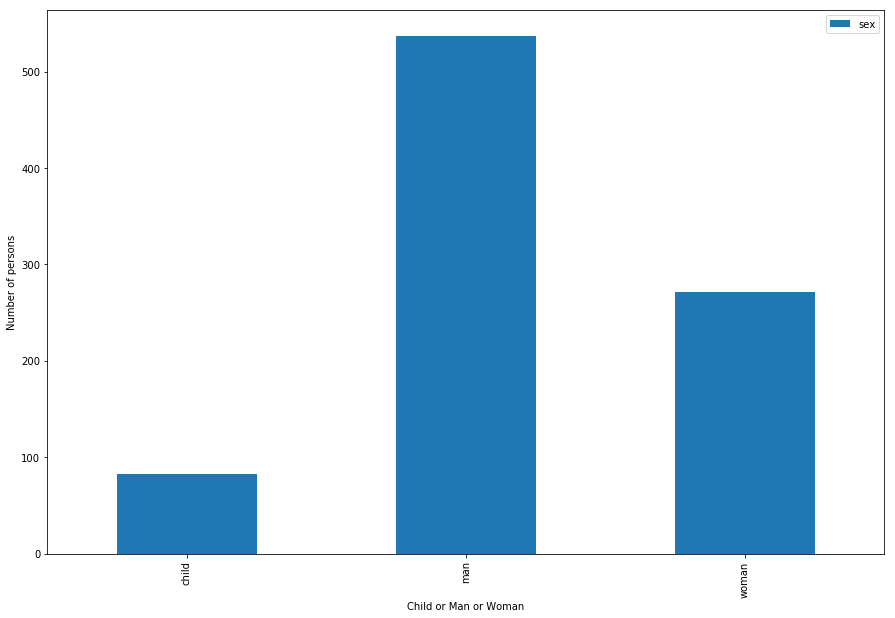

In [44]:
titanic_gender_pivot.plot(kind='bar',figsize=(15,10))
plt.ylabel('Number of persons')
plt.xlabel('Child or Man or Woman')

In [113]:
p = sns.plt(data = titanic_gender_pivot, x = 'who' , y ='count')
p.set(title = 'Gender Distribution by Survival', 
        xlabel = 'Gender', 
        ylabel = 'Whether Survived', 
        xticklabels = ['Male', 'Female']);
plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

# Questions:
## Question-1 : is the econmoic condition of the passengers play any role in the survival?
## We will solve this in two parts
## First : We check the survival related to Cabins(i.e First,Second & Third class
## Second : We We check the survival related to the fare


In [162]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone,Sex_integer
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False,1.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False,0.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True,1.0


In [144]:
def percentage_survival_by_two_factors(data,factor1,factor2):
    
    return data.pivot_table('survived',factor1,factor2)*100
 

In [146]:
# finding survival percentage between class and gender
survival_class_gender=percentage_survival_by_two_factors(titanic,'class','sex')
survival_class_gender

sex,female,male
class,,
First,96.808511,36.885246
Second,92.105263,15.740741
Third,50.000000,13.544669


Both Male and Female have higher chance of survival in the upper class as the data shows .

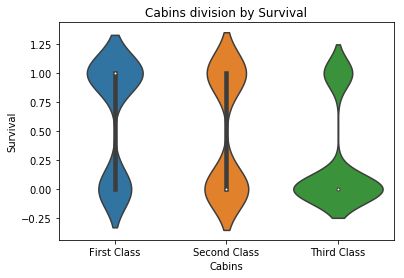

In [154]:
p=sns.violinplot(data=titanic,x='pclass' , y='survived')
p.set(title='Cabins division by Survival',
     xlabel='Cabins',
     ylabel='Survival',
     xticklabels=['First Class' , 'Second Class','Third Class']);


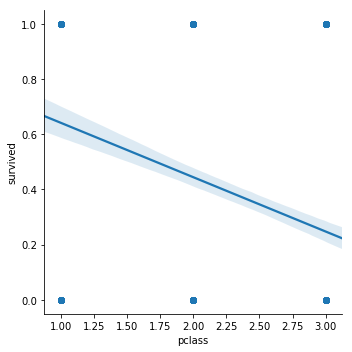

In [151]:
def sns_lmplot(x,y,data):
    sns.lmplot(x,y,data)
    return plt.show()
sns_lmplot(x='pclass',y='survived',data=titanic)

We can see not so much difference between first and second class.
But its clear that many third class passengers had less chance of survival

In [47]:
titanic.survived[titanic.pclass==1]

1      1
3      1
6      0
11     1
23     1
27     0
30     0
31     1
34     0
35     0
52     1
54     0
55     1
61     1
62     0
64     0
83     0
88     1
92     0
96     0
97     1
102    0
110    0
118    0
124    0
136    1
137    0
139    0
151    1
155    0
      ..
763    1
765    1
766    0
779    1
781    1
782    0
789    0
793    0
796    1
802    1
806    0
809    1
815    0
820    1
822    0
829    1
835    1
839    1
842    1
849    1
853    1
856    1
857    1
862    1
867    0
871    1
872    0
879    1
887    1
889    1
Name: survived, Length: 216, dtype: int64

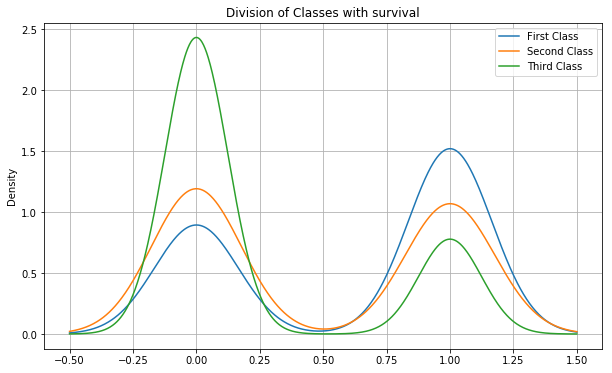

In [53]:
# lets plot this by another plot
titanic.survived[titanic.pclass==1].plot(kind='kde',figsize=(10,6))
titanic.survived[titanic.pclass==2].plot(kind='kde',figsize=(10,6))
titanic.survived[titanic.pclass==3].plot(kind='kde',figsize=(10,6))
plt.title('Division of Classes with survival')
plt.legend(('First Class' , 'Second Class','Third Class'),loc='best')
plt.grid(b=True)

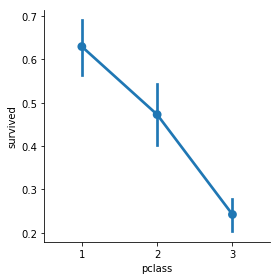

In [64]:
sns.factorplot('pclass','survived',data=titanic)


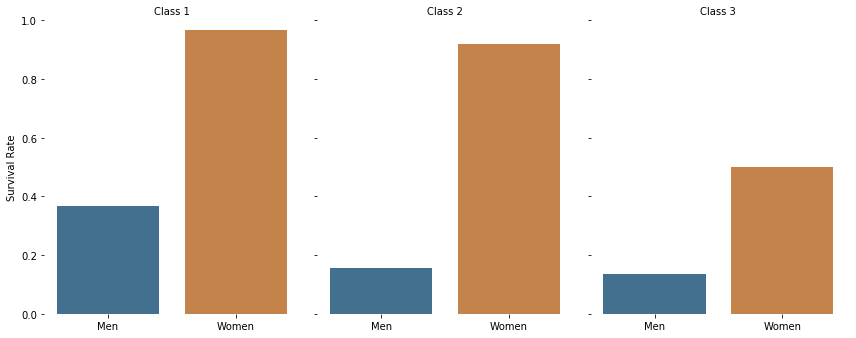

In [235]:
# Graph - Grouped by class, survival and sex
g = sns.factorplot(x="sex", y="survived", col="pclass", data=titanic, 
                   saturation=.5, kind="bar", ci=None, size=5, aspect=.8)

# Fix up the labels
(g.set_axis_labels('', 'Survival Rate')
     .set_xticklabels(["Men", "Women"])
     .set_titles("Class {col_name}")
     .set(ylim=(0, 1))
     .despine(left=True, bottom=True))

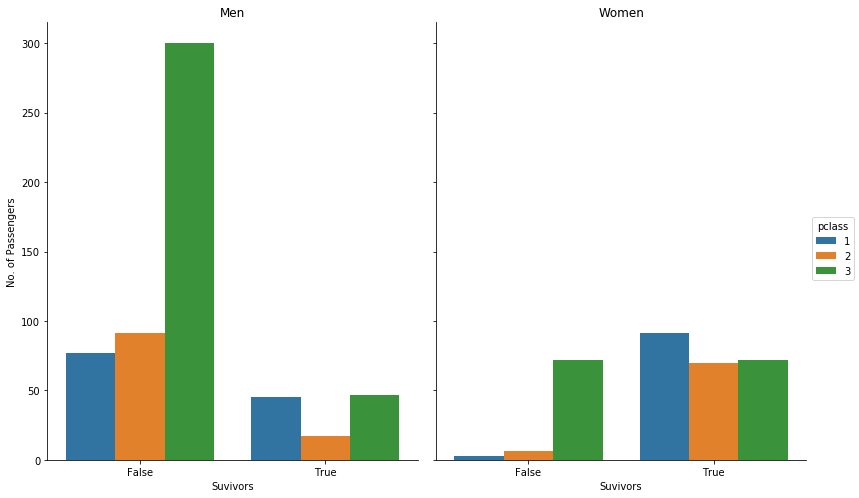

In [239]:
# Graph - Actual count of passengers by survival, group and sex
g = sns.factorplot('survived', col='sex', hue='pclass', data=titanic, kind='count', size=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'No. of Passengers')
    .set_xticklabels(["False", "True"])
    .set_titles('{col_name}')
)

titles = ['Men', 'Women']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

Above FACTOR PLOT shows that Higher Cabin class has more chance of survival

## Second :Now we check the survival with the fares

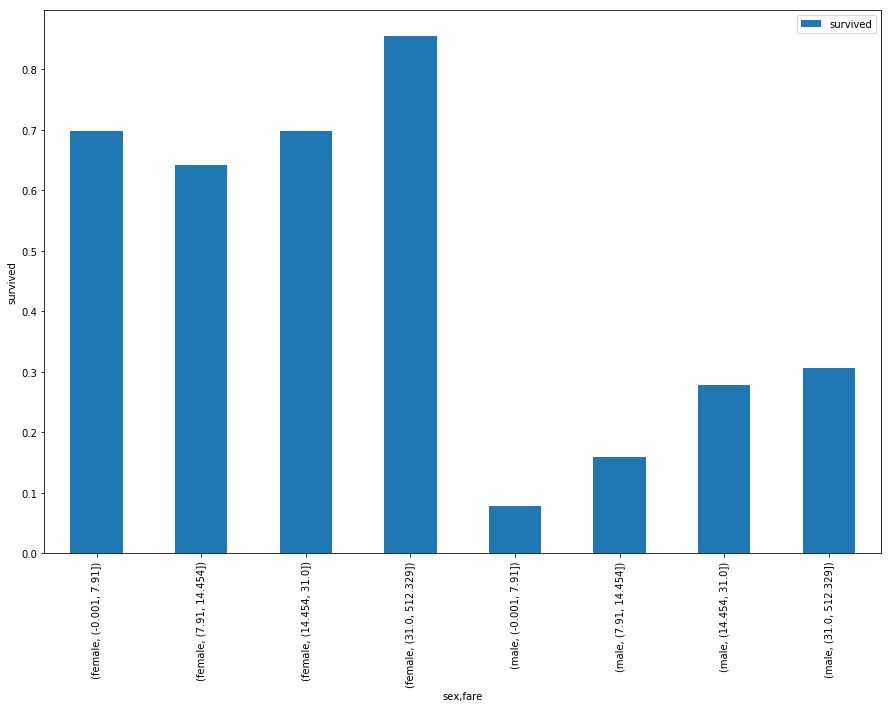

In [185]:
fare = pd.qcut(titanic['fare'], 4)
tt=titanic.pivot_table('survived',['sex',fare])
tt.plot(kind='bar',figsize=(15,10))
plt.ylabel('survived')
plt.show()

Above graph shows that people paying higher fare had more survival chance.This is because they were in Upper Class.We already showed that upper class had more chances of survival

In [181]:
age = pd.cut(titanic['age'], [0, 18, 80])
fare = pd.qcut(titanic['fare'], 2)
titanic_fare=titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

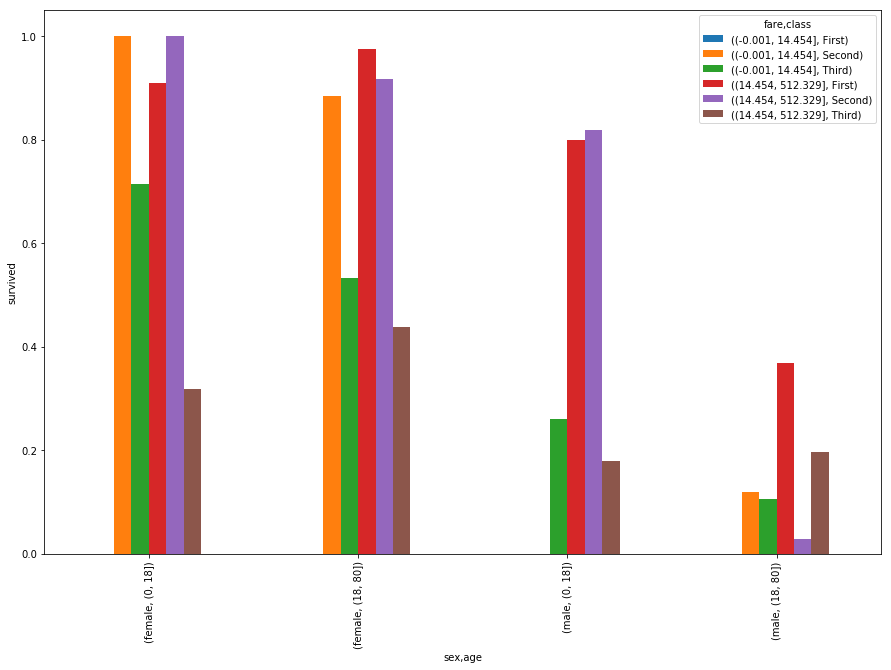

In [182]:
titanic_fare.plot(kind='bar',figsize=(15,10))
plt.ylabel('survived')

In [114]:
age = pd.cut(titanic['age'], [0, 18, 80])
fare = pd.qcut(titanic['fare'], 2)
titanic_fare=titanic.pivot_table('survived', ['sex', age], 'class',aggfunc='mean')

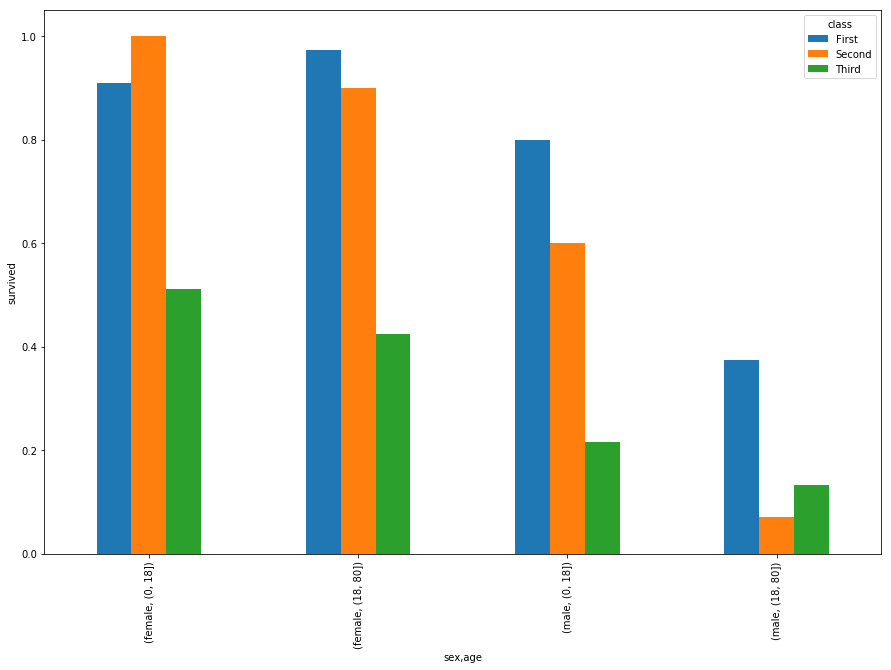

In [115]:
titanic_fare.plot(kind='bar',figsize=(15,10))
plt.ylabel('survived')

We see that the chances for survival in Class-3 is lower for all age and sex groups except for males between 18 and 80 years where Class-2 survival is higher than class-3
Men of all age groups have high survival in upper class
Women of 

I further divide the age in groups 0,20,40,80 and again check the relation between age, class and survival

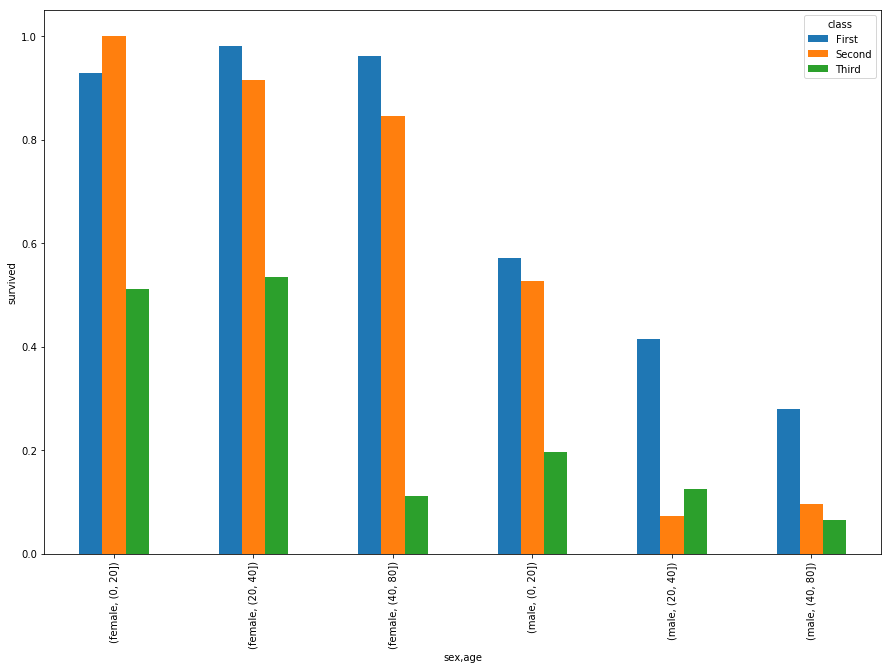

In [114]:
age = pd.cut(titanic['age'], [0, 20,40,80])
fare = pd.qcut(titanic['fare'], 2)
titanic_fare=titanic.pivot_table('survived', ['sex', age], 'class',aggfunc='mean')
titanic_fare.plot(kind='bar',figsize=(15,10))
plt.ylabel('survived')

The above graph again shows that first class had more chance of survival in the above 6 age groups

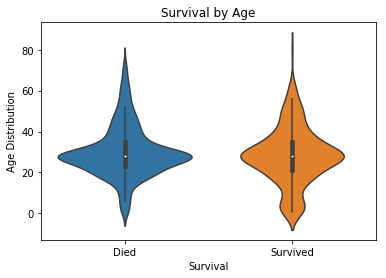

In [115]:
p = sns.violinplot(data = titanic, x = 'survived', y = 'age')
p.set(title = 'Survival by Age', 
        xlabel = 'Survival', 
        ylabel = 'Age Distribution', 
        xticklabels = ['Died', 'Survived']);
plt.show()

In [10]:
def percentage_by_class(data,index,columns):
    return titanic.pivot_table('survived',index,columns)*100
percentage_by_class('survived',index='sex',columns='pclass')    

pclass,1,2,3
sex,,,
female,96.808511,92.105263,50.000000
male,36.885246,15.740741,13.544669


In [163]:
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
titanic.age[titanic.embarked=='S'].plot(kind='kde',figsize=(10,6))
titanic.age[titanic.embarked=='C'].plot(kind='kde')

In [ ]:
df_age_cleaned.Age[df_age_cleaned.Embarked == 'C'].plot(kind='kde', figsize=(10,6))
df_age_cleaned.Age[df_age_cleaned.Embarked == 'Q'].plot(kind='kde', figsize=(10,6))
df_age_cleaned.Age[df_age_cleaned.Embarked == 'S'].plot(kind='kde', figsize=(10,6))
plt.title("Distribution of Age with Port of Embarkment")
plt.xlabel("Age")
plt.legend(('Cherbourg','Queenstown','Southampton'),loc='best') 
plt.grid(b=True)

In [ ]:
df_age_cleaned.Age[df_age_cleaned.Embarked == 'C'].plot(kind='kde', figsize=(10,6))
df_age_cleaned.Age[df_age_cleaned.Embarked == 'Q'].plot(kind='kde', figsize=(10,6))
df_age_cleaned.Age[df_age_cleaned.Embarked == 'S'].plot(kind='kde', figsize=(10,6))
plt.title("Distribution of Age with Port of Embarkment")
plt.xlabel("Age")
plt.legend(('Cherbourg','Queenstown','Southampton'),loc='best') 
plt.grid(b=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import io

# df = pd.read_csv(io.StringIO(u), delim_whitespace=True )

fig, ax = plt.subplots()

sc = ax.scatter(df.v1, df.v2, c=df.yy,  cmap="copper")

fig.colorbar(sc, ax=ax)

ax.set_aspect("equal")


plt.show()

In [90]:
titanic_p = titanic.pivot('Sex_integer', 'fare', 'survived')



ValueError: Index contains duplicate entries, cannot reshape

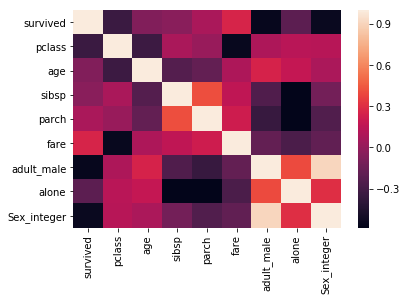

In [81]:

# Calculate correlations
corr = titanic.corr()
 
# Heatmap
sns.heatmap(corr)

In [8]:
#type of data
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
Sex_integer     float64
dtype: object

Most of the ages between 20 and 40
Now we 

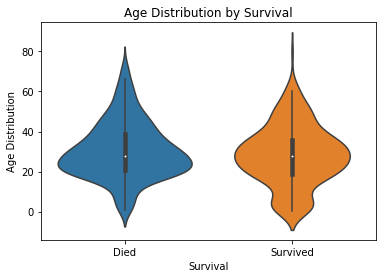

In [22]:
p = sns.violinplot(data = titanic, x = 'survived', y = 'age')
p.set(title = 'Age Distribution by Survival', 
        xlabel = 'Survival', 
        ylabel = 'Age Distribution', 
        xticklabels = ['Died', 'Survived']);

# Is there any relation between the survival between different classes 

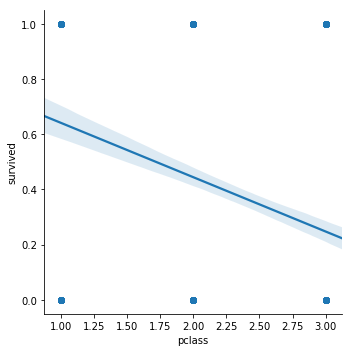

In [9]:
sns.lmplot(x='pclass', y='survived', data=titanic)
plt.show()

The above graph seems to show that upper class have more survival chance..
lets investigate further

# using pivot

In [10]:
titanic.groupby(['sex','class','survived']).size()

sex     class   survived
female  First   0             3
                1            91
        Second  0             6
                1            70
        Third   0            72
                1            72
male    First   0            77
                1            45
        Second  0            91
                1            17
        Third   0           300
                1            47
dtype: int64

In [11]:
def survival_by_class(data,index_name,columns_name,values_name):
    return data.pivot_table(index=index_name,columns=columns_name,values=values_name)*100

survival_by_class(titanic,'sex','class','survived') 

class,First,Second,Third
sex,,,
female,96.808511,92.105263,50.000000
male,36.885246,15.740741,13.544669


In [12]:
def survival_by_class_and_age(data,index_name,columns_name,values_name):
    age=pd.cut(titanic['age'],[0,18,80])
    return data.pivot_table(index=index_name,columns=[columns_name,age],values=values_name)*100
survival_by_class_and_age(titanic,'class','sex','survived') 

sex         female                  male           
age        (0, 18]   (18, 80]    (0, 18]   (18, 80]
class                                              
First    90.909091  97.297297  80.000000  37.500000
Second  100.000000  90.000000  60.000000   7.142857
Third    51.162791  42.372881  21.568627  13.366337

In [13]:
def survival_by_class_and_age(data,index_name,columns_name,values_name):
    age=pd.cut(titanic['age'],[0,18,80])
    return data.pivot_table(index=index_name,columns=[columns_name,age],values=values_name,aggfunc=[np.sum])
survival_by_class_and_age(titanic,'class','sex','survived') 

sum                          
sex     female             male         
age    (0, 18] (18, 80] (0, 18] (18, 80]
class                                   
First       10       72       4       36
Second      14       54       9        6
Third       22       25      11       27

In [15]:
survival_by_class_and_age(titanic,'class','sex','survived') 

sum                          
sex     female             male         
age    (0, 18] (18, 80] (0, 18] (18, 80]
class                                   
First       10       81       4       41
Second      14       56       9        8
Third       22       50      11       36

In [16]:
# if we fill the nill entries of age with mean and then check the results ag
titanic.apply(lambda x : sum(x.isnull()),axis=0)

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
Sex_integer      0
dtype: int64

In [17]:
survival_by_class_and_age(titanic,'class','sex','survived') 

sum                          
sex     female             male         
age    (0, 18] (18, 80] (0, 18] (18, 80]
class                                   
First       10       81       4       41
Second      14       56       9        8
Third       22       50      11       36

In [18]:
#fill the null or NaN values of age with the mean age
titanic['age'].fillna(0)
survival_by_class_and_age(titanic,'class','sex','survived') 

sum                          
sex     female             male         
age    (0, 18] (18, 80] (0, 18] (18, 80]
class                                   
First       10       81       4       41
Second      14       56       9        8
Third       22       50      11       36

In [19]:
survival_by_class_and_age(titanic,'sex','class','survived') 

sum                                           
class    First           Second            Third         
age    (0, 18] (18, 80] (0, 18] (18, 80] (0, 18] (18, 80]
sex                                                      
female      10       81      14       56      22       50
male         4       41       9        8      11       36

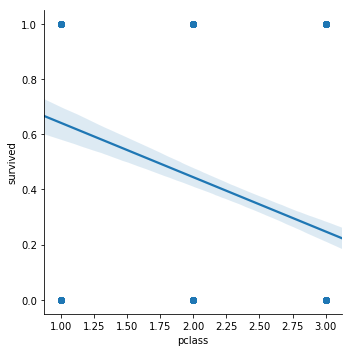

In [20]:
age=pd.cut(titanic['age'],[0,18,80])
sns.lmplot(x='pclass', y='survived', data=titanic)
plt.show()

In [21]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.975904  0.903226  0.495050
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.350427  0.086022  0.121622

In [22]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [23]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [24]:
#now find survival by both sex and class
titanic.groupby(['sex','class'])[['survived']].mean()

survived
sex    class           
female First   0.968085
       Second  0.921053
       Third   0.500000
male   First   0.368852
       Second  0.157407
       Third   0.135447

In [25]:
titanic.groupby(['sex','class'])[['survived']].sum()

survived
sex    class           
female First         91
       Second        70
       Third         72
male   First         45
       Second        17
       Third         47

# clearly shows that upper class have more chance of survival

## check if alone had more survival

In [28]:
titanic.pivot_table('survived','alone')*100

,survived
alone,
False,50.564972
True,30.353818


In [29]:
titanic.pivot_table('survived',['sex'],'alone')*100

alone,False,True
sex,,
female,71.276596,78.571429
male,27.108434,15.571776


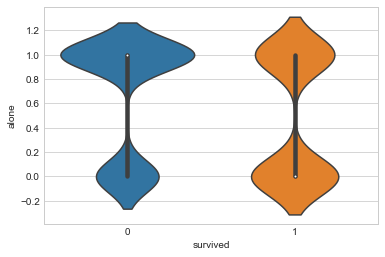

In [30]:
sns.set_style('whitegrid')
sns.violinplot(x='survived', y='alone', data=titanic)
plt.show()

In [31]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Sex_integer
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1.0


In [ ]:
# Melt DataFrame
melted_df = pd.melt(titanic, 
                    id_vars=["sex", "survived", "alone",'pclass','age'], # Variables to keep
                    var_name="Stats") # Name of melted variable
melted_df.head()

In [ ]:
sns.swarmplot(x='pclass', y='survived', data=melted_df)
plt.show()

In [ ]:
# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='survived', data=melted_df, 
              hue='survived')
plt.show()

In [ ]:
titanic.pivot_table(index='sex' ,columns='class',values='survived')*100
# def survival_by_class()

# Cleaning and perparing data

In [ ]:
#checking the data types
titanic.dtypes

In [ ]:
#checking null columns
titanic.isnull().any()

In [ ]:
# titanic.groupby(['Age', 'Sex']).sum().loc[lambda titanic: titanic['Age']> 20]


In [ ]:
#we have Age,Cabin and Embarked having Null values.
# Age column is Integer
#Embarked and Cabin are Object type


In [ ]:
remove_columns(titanic,'Embarked')

In [ ]:
remove_columns(titanic,'Cabin')

In [ ]:
titanic.head()

In [ ]:
titanic.isnull().count()

In [ ]:
titanic.head()

In [ ]:
# Seperating name titles to get some information of some professions like doctors or army men
titanic['all_names']=titanic['Name'].str.split(',').str[1]
titanic.head()

In [ ]:
#step 2 of seperating name titles
titanic['title']=titanic['all_names'].str.split('.').str[0]
titanic.head()

In [ ]:
#removing all names column
titanic.drop('Name',axis=1,inplace=True)

In [ ]:
#convert to integer

titanic['Sex_integer'] = titanic['Sex_integer'].astype(int)
titanic.head()

In [ ]:
titanic.groupby('Sex').sum()['Survived']
# engagement_df.groupby('account_key').sum()['total_minutes_visited']
#.loc[lambda df: df.r > 100]

In [ ]:
titanic.groupby(['Pclass', 'Sex']).size().astype('float')


In [ ]:
titanic.groupby(['Pclass','Survived','Sex']).size().astype('float')

In [ ]:
titanic.groupby(['Pclass','Survived','Sex']).size().astype('float')

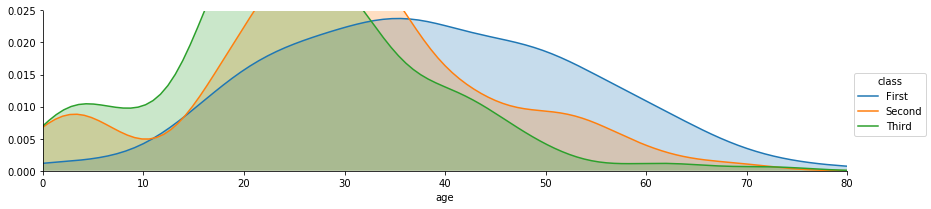

In [63]:
fig = sns.FacetGrid(titanic,hue='class',aspect=4)
fig.map(sns.kdeplot,'age',shade='True')
oldest = titanic['age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [ ]:

# Find total count of survivors and those who didn't
number_survived = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == True]['Survived'].count()
number_died = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == False]['Survived'].count()

# Find average of survivors and those who didn't
mean_age_survived = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == True]['Age'].mean()
mean_age_died = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == False]['Age'].mean(

In [ ]:
sns.violinplot(titanic['Age'], titanic['Sex']) #Variable Plot
sns.despine()

In [ ]:
titanic.groupby(['Sex','all_names'])['all_names'].count().nlargest(10)

In [ ]:
plt.hist(titanic., alpha=.3)
sns.rugplot(df.x);

In [ ]:
titanic.describe()

In [ ]:
def count_values(df,col_name):
    return df[col_name].value_counts()
count_values(titanic,'Cabin')

# I want to find the nan values and fill the mean values in it for fare ,age 

In [88]:
# convert to integer
def parse_maybe_float(f):
    if f == '':
        return None
    else:
        return float(f)
titanic['Age'].apply(parse_maybe_float)
#convert nan to mean



0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [76]:
titanic.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [83]:
missing = np.where(titanic["Age"].isnull() == True)
missing

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888], dt

In [84]:
ag=titanic["Age"].isnull() == True
ag

0      False
1      False
2      False
3      False
4      False
5       True
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17      True
18     False
19      True
20     False
21     False
22     False
23     False
24     False
25     False
26      True
27     False
28      True
29      True
       ...  
861    False
862    False
863     True
864    False
865    False
866    False
867    False
868     True
869    False
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878     True
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [73]:
titanic['Age'].mean()

29.69911764705882

In [70]:
titanic['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F2             3
D              3
F33            3
E101           3
C22 C26        3
B22            2
E8             2
D36            2
D33            2
C126           2
C123           2
C92            2
C52            2
B58 B60        2
C78            2
B35            2
F4             2
E121           2
B51 B53 B55    2
C65            2
D26            2
C124           2
E25            2
E24            2
C93            2
B20            2
E44            2
              ..
B3             1
D30            1
E46            1
D45            1
C49            1
C46            1
A24            1
A16            1
E12            1
B73            1
A31            1
B39            1
D19            1
A36            1
F38            1
E10            1
B42            1
A14            1
B82 B84        1
B41            1
B101           1
A5             1
D47            1
B86            1
B4             1
C85            1
B69            1
C7            

In [65]:
titanic['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [67]:

sum(pd.isnull(titanic['Cabin']))

687

In [68]:
sum(titanic['Cabin'])

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [16]:
# Replacing Nan by 0
#I used inplace=True to change the data
titanic.fillna(0, inplace=True)


In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [20]:
# checking the data types
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [23]:
# checking the categorical variables
categorical = titanic.dtypes[titanic.dtypes == "object"].index
print(categorical)
print(titanic[categorical].describe())

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
                       Name   Sex    Ticket  Cabin Embarked
count                   891   891       891    891      891
unique                  891     2       681    148        4
top     Keane, Miss. Nora A  male  CA. 2343      0        S
freq                      1   577         7    687      644


In [28]:
#checking the floar variables
floats=titanic.dtypes[titanic.dtypes=='float64'].index
print(titanic[floats].describe())

              Age        Fare
count  891.000000  891.000000
mean    23.799293   32.204208
std     17.596074   49.693429
min      0.000000    0.000000
25%      6.000000    7.910400
50%     24.000000   14.454200
75%     35.000000   31.000000
max     80.000000  512.329200


In [41]:
#check the different data types
def check_dtypes(data_frame,data_type):
    data_index=data_frame.dtypes[data_frame.dtypes==data_type].index
    return data_frame[data_index].describe()

In [44]:
floats=check_dtypes(titanic,float)
floats

,Age,Fare
count,891.000000,891.000000
mean,23.799293,32.204208
std,17.596074,49.693429
min,0.000000,0.000000
25%,6.000000,7.910400
50%,24.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [47]:
check_dtypes(titanic, object )

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,148,4
top,"Keane, Miss. Nora A",male,CA. 2343,0,S
freq,1,577,7,687,644


In [55]:
print (titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [58]:
fares_pclass = sanitized_data[["Fare", "Pclass"]]

def fare_distribution_by_class(fares_class, pclass="Lower", color="grey", bin_width=10):
    class_fares = fares_class[fares_class["Pclass"] == pclass]["Fare"]
    bins = range(int(round(min(class_fares),-1)), int(round((max(class_fares)+10), -1)), bin_width)
    class_fares.plot.hist(color=color, figsize=(4,3), bins=bins, title=("Distribution of %s Class Ticket Fares" % pclass)).set_xlabel("Fare in Dollars")
                          
fare_distribution_by_class(fares_pclass)
plt.figure()
fare_distribution_by_class(fares_pclass, pclass="Middle", color="Teal")
plt.figure()
fare_distribution_by_class(fares_pclass, pclass="Upper", color="Gold", bin_width=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
